In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("card_transdata.csv")

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# Handle Missing Values

In [7]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

# Check Dataset Shape

In [8]:
df.shape

(1000000, 8)

# Analyze Correlations and Visualize¶

In [9]:
corr_matrix=df.corr()

In [10]:
corr_matrix

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


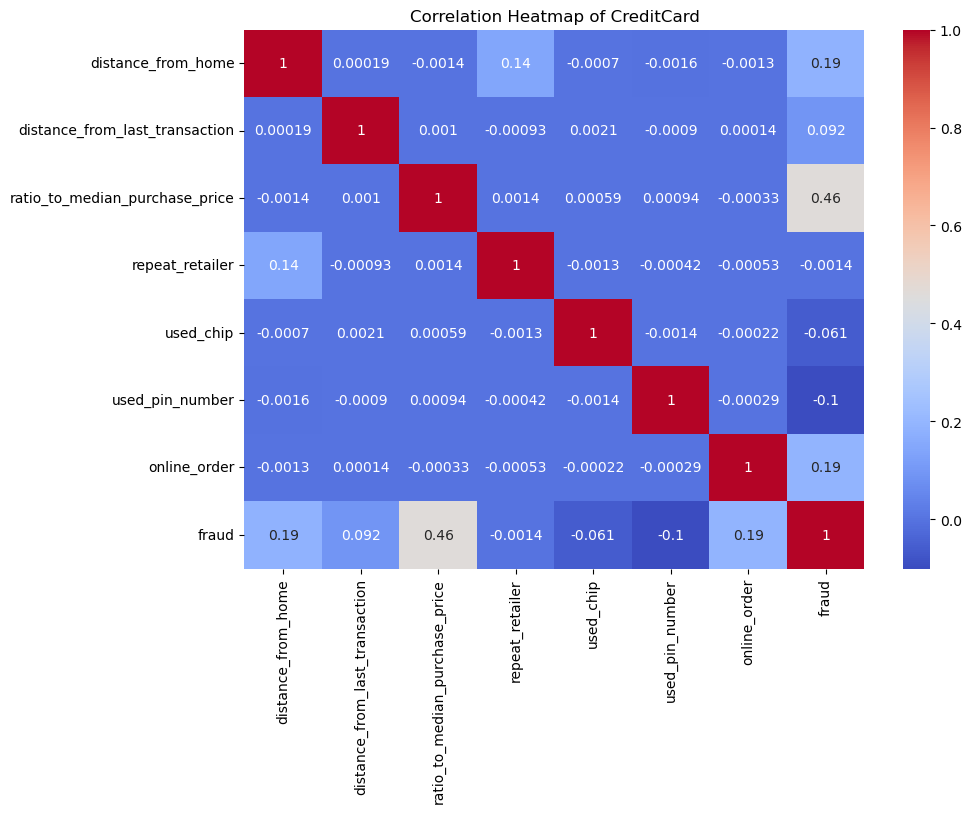

In [11]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,)   # annot = True will display the data values in each cell of the heatmap.
plt.title("Correlation Heatmap of CreditCard")
plt.show()

# Define Features and Target Variable

In [12]:
x = df.iloc[:,:6]
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
0,57.877857,0.311140,1.945940,1.0,1.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0
...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0


In [13]:
y=df.iloc[:,-1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

# Identify and Treat Outliers

In [14]:
numerical_cols = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order','fraud']

In [15]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

distance_from_home                21.865977
distance_from_last_transaction     3.059077
ratio_to_median_purchase_price     1.620697
repeat_retailer                    0.000000
used_chip                          1.000000
used_pin_number                    0.000000
online_order                       1.000000
fraud                              0.000000
dtype: float64

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
lower_bound
upper_bound

distance_from_home                58.542951
distance_from_last_transaction     7.944363
ratio_to_median_purchase_price     4.527416
repeat_retailer                    1.000000
used_chip                          2.500000
used_pin_number                    0.000000
online_order                       2.500000
fraud                              0.000000
dtype: float64

# Normalize Data

# Split Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # random_state is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it.
# In other words, it ensures that the same randomization is used each time you run the code,resulting in the same splits of the data.

In [21]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
566853,36.217183,0.247838,0.181411,1.0,1.0,0.0
382311,20.673837,0.573091,0.663585,1.0,1.0,0.0
241519,4.785209,2.389048,3.537959,1.0,1.0,0.0
719220,5.911469,1.238674,0.283680,1.0,0.0,0.0
905718,31.651844,1.688151,0.174281,1.0,0.0,0.0
...,...,...,...,...,...,...
259178,0.539606,3.479517,0.129496,0.0,0.0,0.0
365838,113.803098,0.165044,1.523632,1.0,0.0,0.0
131932,20.473521,0.004376,0.915167,1.0,0.0,0.0
671155,9.958865,0.168019,1.174115,1.0,0.0,0.0


In [22]:
y_train

566853    0.0
382311    0.0
241519    0.0
719220    0.0
905718    0.0
         ... 
259178    0.0
365838    0.0
131932    0.0
671155    0.0
121958    0.0
Name: fraud, Length: 800000, dtype: float64

In [23]:
x_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
987231,0.929509,1.296477,0.361110,0.0,0.0,0.0
79954,0.611179,0.208295,3.118884,0.0,0.0,0.0
567130,3.956062,0.529194,1.579942,1.0,0.0,0.0
500891,21.798902,0.019399,11.416909,1.0,0.0,0.0
55399,3.310635,1.707802,2.028915,1.0,0.0,0.0
...,...,...,...,...,...,...
90245,56.686649,0.820179,6.051695,1.0,0.0,1.0
639296,5.544863,0.072644,1.350344,1.0,0.0,0.0
311939,4.449740,2.045690,9.814511,1.0,1.0,0.0
324459,34.624330,0.580115,0.424248,1.0,0.0,0.0


# RandomForest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix

In [25]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

# n_estimators is the number of decision trees in the forest. Increasing this hyperparameter improves the performance of the model but also increases the cost of training and predicting.
# max_depth is the number of splits that each decision tree is allowed to make if the no of splits is too low,the model undefits the data and if it is too high the model overfits.

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [26]:
y_pred = rf_model.predict(x_test)

In [27]:
x_sample, y_sample = x_train[:100000],y_train[:100000]
rf_model.fit(x_sample, y_sample)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [28]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average="weighted")

In [29]:
accuracy

0.959875

In [30]:
print(type(accuracy_score))

<class 'function'>


In [31]:
precision

0.9724550641285402

In [32]:
confusion_matrix=confusion_matrix(y_test, y_pred)

In [33]:
confusion_matrix

array([[174548,   8009],
       [    16,  17427]], dtype=int64)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [36]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
train_pred = dtc.predict(x_train)
test_pred = dtc.predict(x_test)

In [38]:
accuracy_score(y_train,train_pred)

1.0

In [39]:
accuracy_score(y_test,test_pred)

0.94765

In [40]:
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[174548   8009]
 [    16  17427]]


In [41]:
precision = precision_score(y_test, y_pred,average="weighted")
precision

0.9724550641285402

# SVM

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lreg = LogisticRegression()
lreg.fit(x_train,y_train)

C:\Users\sneha shinde\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
train_pred= lreg.predict(x_train)

In [45]:
test_pred = lreg.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_train,train_pred)

0.92939375

In [47]:
conf_matrix=confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[174548   8009]
 [    16  17427]]


In [48]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    182557
         1.0       0.69      0.36      0.47     17443

    accuracy                           0.93    200000
   macro avg       0.82      0.67      0.72    200000
weighted avg       0.92      0.93      0.92    200000



In [49]:
print(x_train.shape, y_train.shape)

(800000, 6) (800000,)
